# Kubernetes

### Ref:
1. Google Doc: https://cloud.google.com/kubernetes-engine/docs/concepts/kubernetes-engine-overview
2. Gcloud Ref: https://cloud.google.com/sdk/gcloud/reference/container/clusters/create
3. Kubernetes Official Site: https://kubernetes.io/docs/home/
4. TutorialsPoint: https://www.tutorialspoint.com/kubernetes/index.htm
5. Private Cluster Cloudskillboost: https://www.cloudskillsboost.google/focuses/867?locale=it&parent=catalog


### Youtube Ref:
  1. Youtube Video: https://www.youtube.com/watch?v=X48VuDVv0do&t=661s
  2. Youtube: https://www.youtube.com/watch?v=cC46cg5FFAM&list=PLIivdWyY5sqLmnGdKSdQIXq2sd_1bWSnx
  3. Youtube: https://www.youtube.com/watch?v=d6WC5n9G_sM
  4. Create Kubernetes cluster on GCP: https://www.youtube.com/watch?v=hxpGC19PzwI


### Other Ref:
1. Windows and Unix Command: https://gist.github.com/carlessanagustin/266171818584b3880f72a625dfa2513b

### What is Kubernetes:
1. **Kubernetes** is a container orchestrator.
  1. open source cluster management system

2. In GCP, Kubenetes cluster options:
  1. **Standard**:
    1. left side has sections, middle one is for input and right side has summary of the cluster.
    1. under cluster basics, it can be zonal or regional
    2. **Release Channel or Static version**:
        1. Release Channel provides, How frequently, google will update the kubernetes version.
        2. Static version means, cluster should be manage by the admin.
    3. **Node Pools:**
        1. Configure the number of worker nodes.
        2. enable auto-scalling.
        3. node auto-upgrade and auto-repair.
        4. inside default node pool, configure machine type
        5. in security, add service account
        6. in metadata section, add node specific metadata
    4. **Cluster**:
        1. Automation:
            1. Maintenance window
        2. Networking:
            1. configure public or private network
        3. Security:
            1.
        4. Metadata
        5. Features

  2. **AutoPilot**:
    1. Its always regional
    2. Networking: Public cluster or Private cluster
    3. Advanced option:
      1. Release Channel provides, How frequently, google will update the kubernetes version. (Rapid, Regular, Stable)
      2. Enable maintenance window
      3. Metadata to organise the cluster
      4. labels to organise the cluster

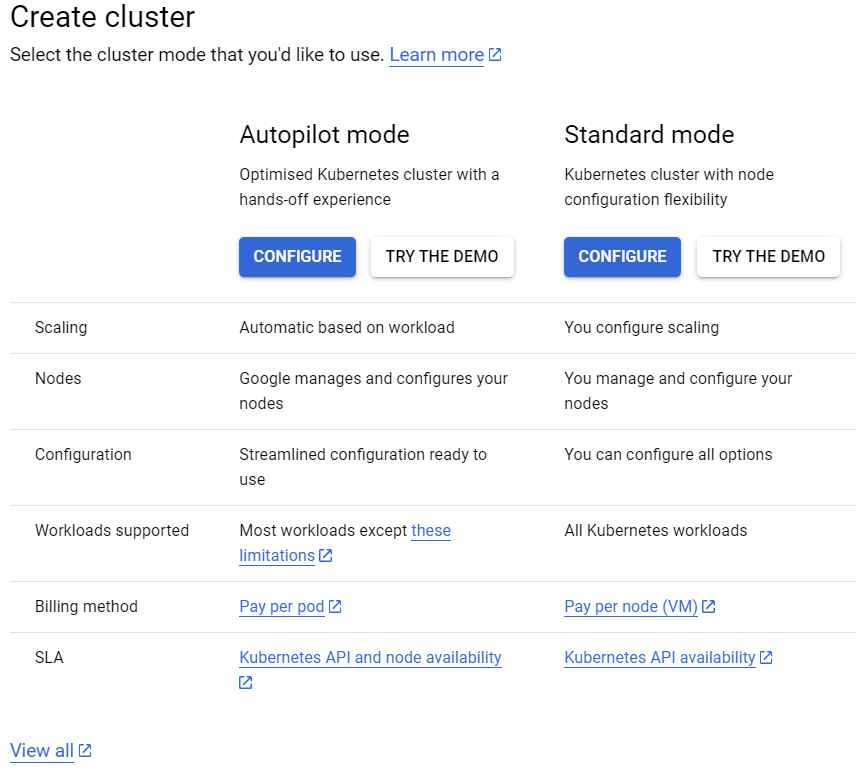

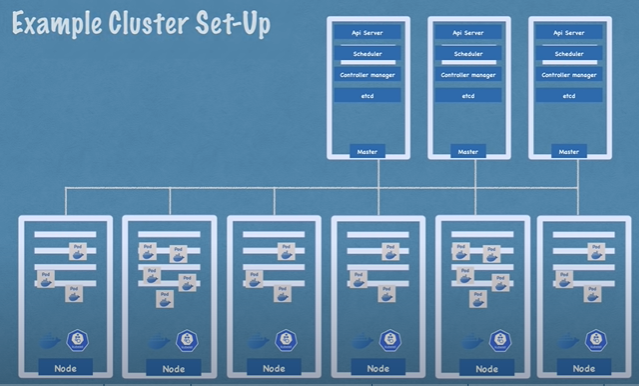

### Kubernetes Basic Components

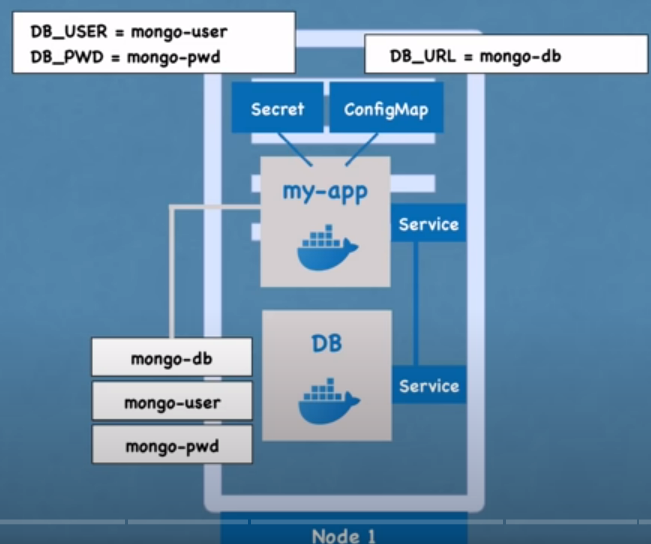

1. **Node :** Servers or physical or virtual machines like worker machines

2. **Pod :**
  1. Smallest unit in K8s
  2. Abstraction over container
  3. Creates running layer on top of the containers.
  4. Usually 1 application per Pod.
  5. Each Pod has its own IP address.
  6. *New IP address will assigned on re-creation or restart of the Pod.* And its natural in K8s, Pods getting crashed and re-created after that. So communication between Pods can be happended through "Service" which has static ip.

3. **Service :**
  1. is a static or permanent IP address and attached with each Pod.
  2. Pods are comunicating between each other using Service.
  2. lifecycle of Pod and Service is not Connected.
  3. Service can be divided into-
    1. **External Service -** External service helps to open the app from external source (example: http://\<service_ip\>:\<port\> or http://\<node_ip\>:\<port\>).
    2. **Internal Service -** Like DB connection which communicated internally between pods not required to be exposed to public internet.
  4. Service can be *load balancer*.

4. **Ingress :**
  1. Its similar to the External Service through which you can make available the app endpoint to public internet (example: https://\<domain_name\>)

5. **ConfigMap :**
  1. external configuration of your application.
  ```
  DB_URL = mongo-db-service
  ```
  2. Pods can fetch the external configuration values from ConfigMap.
  3. Don't put DB password/credentials inside the ConfigMap.

6. **Secret :**
  1. Secret is similar like ConfigMap but Its basically to store the secret data.
  2. Its store data base64 encoded format.
  3. Use Secret or ConfigMap data as environmental variable or as a properties file.

### Data Storage in Kubernetes

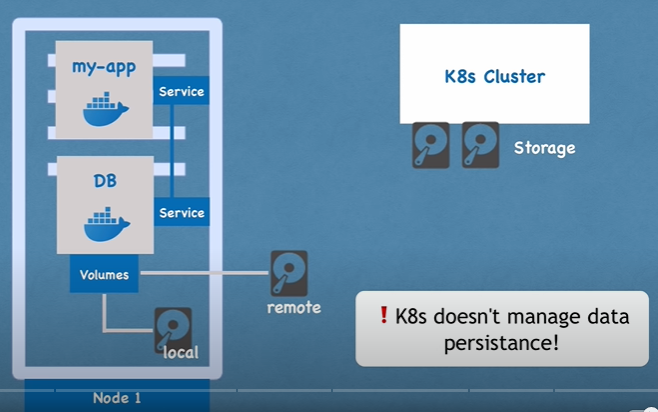

1. Volumnes
  1. Attaches physical storage to the Pods so that if Pods get re-started still application data or log data will be persisted and will not be lost.
  2. K8s doesn't manage data persistance and Volumns handles the data irrespective of the K8s cluster lifespan.
  2. Volumnes has 2 types:
    1. local: storage on local machine, means in same server node where Pod is running.
    2. remote: outside of the K8s cluster, it can be cloud storage.

### Deployment and stateful Set

image.png

1. Service fetch requests and forward it to the Pod which is less busy, act as Load-Balancer.

2. Deployment:
  1. To create the 2nd replica of the Pod, we define the blueprint of the Pod instead of creating the actual pod.
  2. We can specify how many replicas of that Pod, we would run. So we can scale up and scale down.
  3. As Pod is abstraction layer on top of containers and Deployments another abstraction on top of Pods.
  4. DB can't be replicate via Deployment as DB has state. So we need shared data storage and mechanism to manage which Pods are reading the data and which Pods are writing the data into storage to avoid inconsistency.
  5. Deployments is for stateless apps.

3. StatefulSet:
  1. StatefulSet used to replicate StateFul Apps or Databases.
  2. Deloying DB using stateful is tedius job and more difficult than deployments.
  2. Host database application outside of the K8s cluster and just have the deployments of the stateless applications



### Kubernetes Architechture

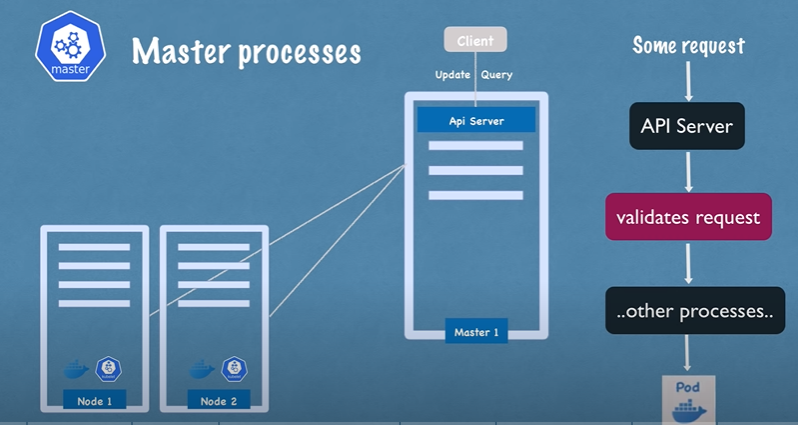

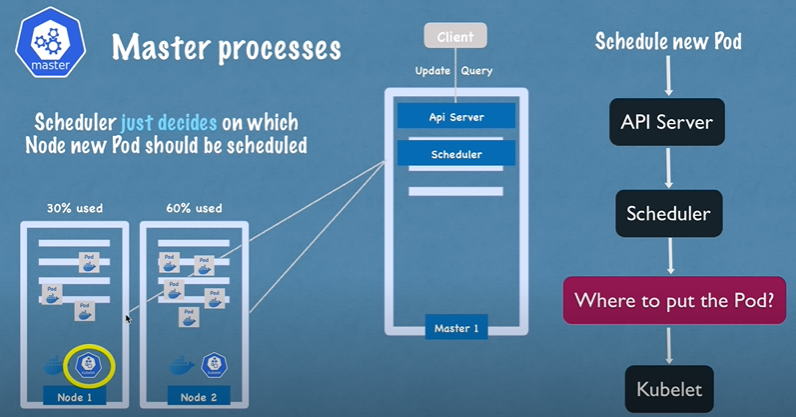

image.png

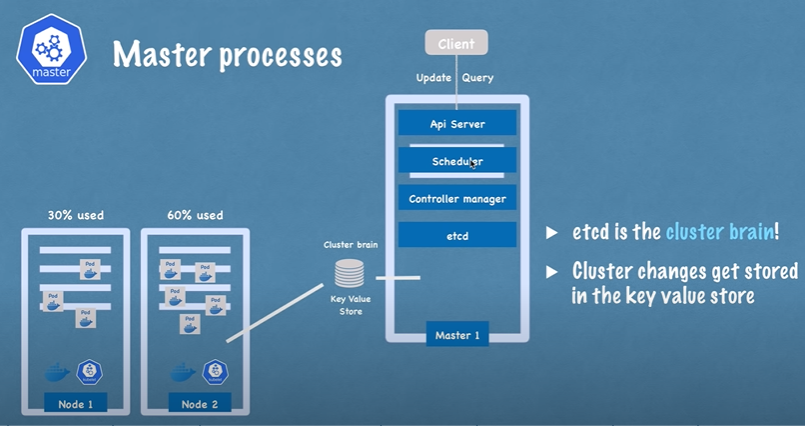

image.png

1. **K8s Nodes:**
  1. There are Master and Slave/Worker Nodes
  >> There can be more than 1 master node and "API Server" will act as load balancer and "etcd" will act as distributed storage of cluster state.
  2. **Master Nodes:**
    1. Managing processes are done by Master Nodes.
    2. 4 processes are running on Master Node which control the cluster state and worker nodes.
        1. **Api Server:**
          1. Api Server is ther cluster gateway which receives the requests from client (UI, command line tool-Kubelet).
          2. Its act as a gatekeeper for authentication.
        2. **Scheduler:**
          1. Scheduler just decides  on which Node the Pod should be scheduled.
          2. It passes the request to Kubelet based on its intelligence.
        3. **Controller Manager:**
          1. Detects the cluster state changes and create/re-schedule the dead Pods once its crashed.
        4. **etcd:**
          1. its a key-value store of a cluster state.
          2. Its a cluster brain.

  3. **Worker Node:**
    1. Each node has multiple Pods on it.
    2. **3 processes must be installed on every worker nodes.**
      1. **Container runtime :** Example Docker
      2. **Kubelet :** (scedules the pod and underneath containers)
        1. Kubelet interacts with both - the container in pods and node.
        2. Kubelet starts the pod with a container inside.
        3. Assigning resources (cpu, storage) to pod.
      3. **Kube Proxy :** Kube proxy forwards the requests from services to Pods.
    3. Worker nodes do the actual work.


### QnA: How to interact with the cluster?
1. Schedule Pod
2. if replica pod dies, what process monitor?
3. restart or re-schedule the pod?
4. join another Node inside the cluser and create the pods and other components?

### Minikube

#### Ref:
1. https://minikube.sigs.k8s.io/docs/start/

image.png

### Kubectl

#### Ref:
1. Install Kubectl: https://kubernetes.io/docs/tasks/tools/
2. Kubectl commands Gitlab: https://gitlab.com/nanuchi/youtube-tutorial-series/-/blob/master/basic-kubectl-commands/cli-commands.md

#### Kubectl Commands
```python
## version of kubectl
kubectl version

## get node details
kubectl get nodes

## get services details
kubectl get service

### deployment -> Replicaset -> Pod -> Container

## get pod details
kubectl get pod

kubectl get pod -o wide

## create the kubernetes pods
kubectl create deployment nginx-depl --image=nginx
kubectl create deployment mongo-depl --image=mongo

## get deployment details
kubectl get deployment

kubectl get deployment <deployment name> -o yaml

kubectl get replicaset

## edit the config of deployment
kubectl edit deployment nginx-depl

### debugging pod
kubectl logs <pod name>

kubectl describe pod <pod name>

kubectl describe service <service name>

## get interactive terminal inside the pod/container
kubectl exec -it <pod name> -- bin/bash

## delete the deployment, it will terminate the pod as well
kubectl delete deployment <deployment name>

## use yaml config file instead of "kubectl create deployment <name> <image> <options> .."
kubectl apply -f <config-file.yaml>

kubectl delete -f <config-file.yaml
```

### YAML Configuration file in Kubernetes

1. **YAML file has 3 basic components:**
  1. **metadata:**
    1. it consists of name, labels, ..
  2. **specification:**
    1. it consists spacification of the specific kind.
  3. **status:**
    1. check the status of deployment file and actual current configuration.

2. **YAML file also starts with apiVersion and kind**
  1. **apiVersion:**
    1. apps/v1 for Deployment Kind
    2. v1 for Service kind

  2. **kind**:
    1. Service
    2. Deployment

#### Format of the YAML Configuration file
Ref:
1. https://kubernetes.io/docs/tasks/manage-kubernetes-objects/declarative-config/

```yaml
apiVersion: apps/v1
kind: Deployment
metadata:
  name: nginx-deployment
spec:
  selector:
    matchLabels:
      app: nginx
  minReadySeconds: 5
  template:
    metadata:
      labels:
        app: nginx
    spec:
      containers:
      - name: nginx
        image: nginx:1.14.2
        ports:
        - containerPort: 80
```

1. **metadata**:
  1. it contains **"labels"**

1. **spec**:
  1. has another component named, **"template"**.
  2. has another component **"selector"**

2. **template** has its own **metadata** and **spec** (specification) and its looks like template configuration inside deployment configuration.
  1. this **template configuration actually applied into Pod**.
  2. its a blueprint of the Pod (image, port, name of the container).

##### labels are matched by the selector

image.png

##### Ports in Service and Pod

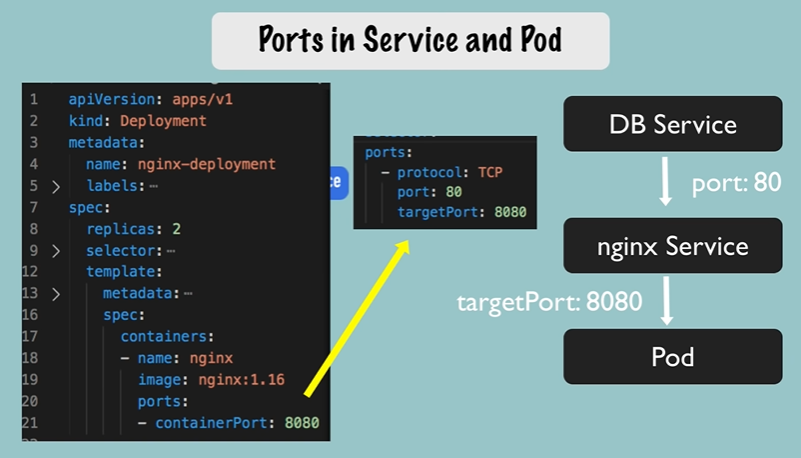

## Create sample containerized workloads to run on Kubernetes cluster


#### containerized Workloads 1
##### Ref: https://dev.to/itminds/hello-python-through-docker-and-kubernetes-379d

#### containerized Workloads 2
#### Ref: https://www.youtube.com/watch?v=XltFOyGanYE
#### Ref: https://betterprogramming.pub/python-fastapi-kubernetes-gcp-296e0dc3abb6
#### Ref: https://medium.com/analytics-vidhya/deploying-a-ml-model-with-fastapi-on-google-kubernetes-engine-google-cloud-platform-bc2adbe0a35a

##### Setup python code with FastAPI in cloudshell

```python
## create new proj directory
mkdir kubernetes_python_demo && cd kubenetes_python_demo

## create the python virtual env
python3 -m venv ./env

## Activate the Python Virtual Env
source ./env/bin/activate

## create requirement.txt and update the file
touch requirements.txt
echo -e "fastapi~=0.79\nuvicorn~=0.18" >> requirements.txt
cat requirements.txt

## install python dependency modules
pip install -r ~/kubernetes_python_demo/requirements.txt

```

##### Create the main.py file for FastAPI

```python
## Create proj working directory
mkdir app && cd app

## Set working directory
cd ~/kubernetes_python_demo/app

## Create the workload app in python
touch __init__.py
nano main.py

## copied the below sample api script into main.py
## Ref: "https://fastapi.tiangolo.com/#create-it"
```

```python
## sample api script

from fastapi import FastAPI
import os

app = FastAPI()


@app.get("/")
def read_root():
    return {"Hello": f"from: {os.environ.get('ENV', 'default_env')}"}
```

##### Run the server with uvicorn locally for developing/testing

```python
## run the server with uvicorn
# uvicorn main:app --reload
python -m uvicorn main:app --reload
```

##### Setup Docker in cloudshell and test the same from cloudshell env

```python
## Creating the container to run the above sample python code
## Ref: https://fastapi.tiangolo.com/deployment/docker/

## Set working directory
cd ~/kubenetes_python_demo/

## create Dockerfile
touch Dockerfile
```

```python
## copy below code inside the Dockerfile
##--====================================================================
FROM python:3.9

WORKDIR /code

COPY ./requirements.txt /code/requirements.txt

RUN pip install --no-cache-dir --upgrade -r /code/requirements.txt

EXPOSE 8080

COPY ./app /code/app

# Use the ping endpoint as a healthcheck,
# so Docker knows if the API is still running ok or needs to be restarted
HEALTHCHECK --interval=21s --timeout=3s --start-period=10s CMD curl --fail http://localhost:8080/ || exit 1

CMD ["uvicorn", "app.main:app", "--host", "0.0.0.0", "--port", "8080"]
##--====================================================================
```

##### Build the Docker image locally and test the FastAPI

```python
## build the docker image locally
docker build -t k8s-fast-api .

## run the docker from local and forward the port 8000 to 80
docker run -p 8080:8080 k8s-fast-api

## curl command to test the api through command line
curl -X 'GET' localhost:8080 -H "Content-Type: application/json" -d {}
```

##### Docker Commands
Ref:
1. https://docs.docker.com/engine/reference/run/

```shell
docker --help

## list all docker images
docker images
## list running containers
docker ps
## list all containers
docker ps -a


## Publish a container's port(s) to the host
docker container run -p 8080:8080 k8s-fast-api
## list all the container
docker container ls
## view resource usage stats
docker inspect <container_name> (or <container_id>)
docker container stats
## stop the container
docker container stop e3389b3c525d #container_id
docker container start e3389b3c525d
docker container restart e3389b3c525d


docker exec -it <container_name> sh ## pwd, ls
docker logs -f <container_name>

## delete the docker images
docker rmi <image_name>
## delete the unused docker images
docker image prune
```

## Step by step process to set-up Kubernetes Cluster (**Standard**)
Ref:
2. https://cloud.google.com/kubernetes-engine/docs/how-to/private-clusters#console

### For Windows (from local machine through gcloud sdk)

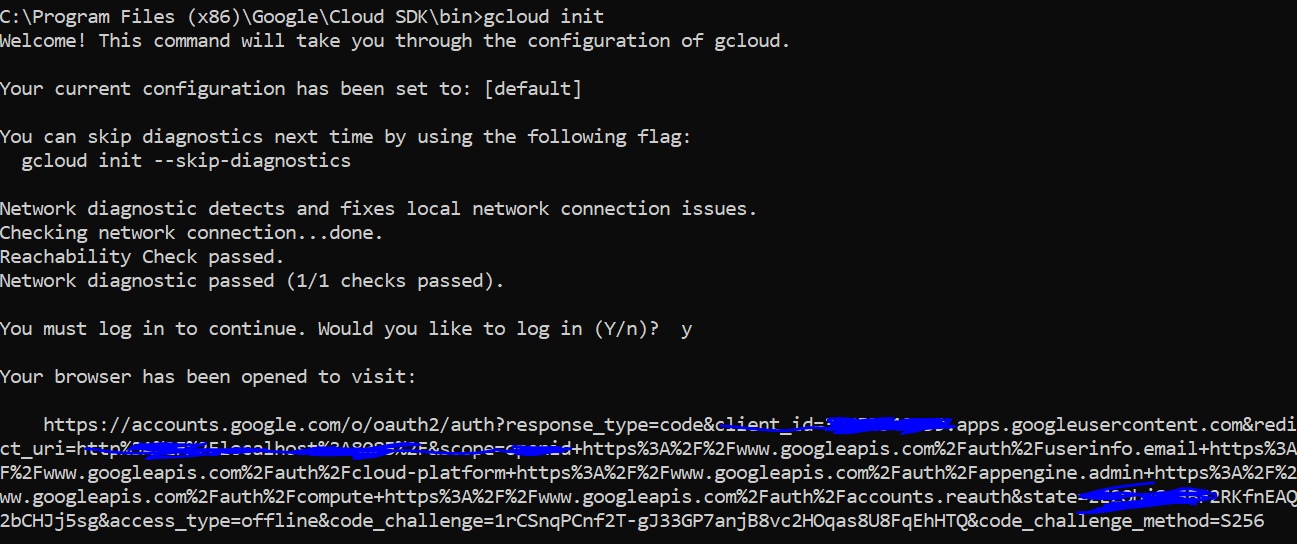

In [ ]:
gcloud init

# press y to start the process.
# once "Sign in with Google" will open by new browser, login with your email id.
# click <allow> button on "google cloud sdk" to access to your google account.
# after successful attempt, will receive the message "you are now authenticated with gcloud cli"
# and in cmd, you need to to pick the gcloud project or need to create the gcloud project.

gcloud components update
gcloud components install kubectl  ## not allowed due to administrative permission issue

## Follow https://cloud.google.com/sdk/docs/proxy-settings to install kubectl
gcloud config set proxy/type http
gcloud config set proxy/address 10.255.0.83
gcloud config set proxy/port 80

set CLOUDSDK_PROXY_USERNAME=ipal2@jaguarlandrover.com
set CLOUDSDK_PROXY_PASSWORD=[PASSWORD]

# gcloud config set core/custom_ca_certs_file [PATH_TO_CUSTOM_CA]

In [ ]:
gcloud info --run-diagnostics

In [ ]:
gcloud config set account ipal2@jaguarlandrover.com

gcloud config set project jlr-dl-cat-training

gcloud config list

In [ ]:
## Set-up variables for Windows OS
set CLUSTER_NAME=cluster-temp1
set REGION=europe-west2
set ZONE=europe-west2-c
set NETWORK=cat-training-network
set SUBNETWORK=cat-training-subnet
set SERVICE_ACCOUNT=cat-training-kubernetes@jlr-dl-cat-training.iam.gserviceaccount.com

In [ ]:
## To get list of all env variables
# set

## To print the particular value of the env variable
# echo %CLUSTER_NAME%

#### Create the kubernetes cluster

In [ ]:
## Create the kubernetes cluster
gcloud container clusters create %CLUSTER_NAME% ^
--service-account=%SERVICE_ACCOUNT% ^
--network=%NETWORK% ^
--subnetwork=%SUBNETWORK% ^
--async

#### kubectl commands

In [ ]:
## access the kubernetes cluster through kubectl


#### Delete the kubernetes cluster

In [ ]:
## Delete the kubernetes cluster
gcloud container clusters delete %CLUSTER_NAME%

### For Unix (cloud-shell)
*Depends on previous section - "containerized Workloads 2"*

#### Activate Cloud-Shell

```shell
gcloud auth list
gcloud config list project
```

#### Setup the env variable

```python
export ACCOUNT=ipal2@jaguarlandrover.com
export PROJECT=jlr-dl-cat-training
export REGION=europe-west2
export ZONE=europe-west2-c
export NETWORK=cat-training-network
export SUBNETWORK=cat-training-subnet
export SERVICE_ACCOUNT=cat-training-kubernetes@jlr-dl-cat-training.iam.gserviceaccount.com

export CLUSTER_NAME=cluster-temp1 #cluster-1

export GCR_LABEL=k8s-fast-api

export VM_INSTANCE_NAME=k8-cluster-connect
```

#### Gcloud Config Set-up inside cloud-shell

```shell
gcloud config set account $ACCOUNT
gcloud config set project $PROJECT
# gcloud compute zones list
gcloud config set compute/zone $ZONE
```

#### Create GCR (Google Cloud Container Registry) image using cloud builds command

```python
#### Create the gcr (google container registry) using gcloud build
export TEMPLATE_IMAGE="gcr.io/$PROJECT/kubernetes/$GCR_LABEL:latest"
gcloud builds submit --tag $TEMPLATE_IMAGE .

```

#### Create the kubernetes cluster (Standard Mode)

```python
gcloud container clusters create $CLUSTER_NAME \
--service-account=$SERVICE_ACCOUNT \
--network=$NETWORK \
--subnetwork=$SUBNETWORK \
--zone $ZONE \
--num-nodes=3 \
--async
```

```shell
gcloud container clusters get-credentials $CLUSTER_NAME --zone $ZONE --project $PROJECT


```

#### Get Cluster list and credentials (public Clusters) to access through kubectl

```python
## Get Cluster list
gcloud container clusters list

## Get cluster credentials
gcloud container clusters get-credentials $CLUSTER_NAME \
--region $REGION
## or
gcloud container clusters get-credentials $CLUSTER_NAME \
--zone $ZONE
```

####  Deploy the application and service, using Kubectl

```python
## Set working directory
cd ~/kubenetes_python_demo/

## create kubernetes deployment file
touch api.yaml
```

In [ ]:
# kubernetes-fastapi LoadBalancer Service
# Enables the pods in a deployment to be accessible from outside the cluster
apiVersion: v1
kind: Service
metadata:
  name: kf-api-svc
spec:
  selector:
    app: kf-api
  ports:
    - protocol: "TCP"
      port: 8080
      targetPort: 8080
  type: LoadBalancer

---
# kf-api Deployment
# Defines the deployment of the app running in a pod on any worker node
apiVersion: apps/v1
kind: Deployment
metadata:
  name: kf-api
  labels:
    app: kf-api
spec:
  replicas: 1
  selector:
    matchLabels:
      app: kf-api
  template:
    metadata:
      labels:
        app: kf-api
    spec:
      containers:
        - name: kf-api
          image: gcr.io/jlr-dl-cat-training/kubernetes/k8s-fast-api
          ports:
            - containerPort: 8080
          imagePullPolicy: Always
          resources:
            # You must specify requests for CPU to autoscale
            # based on CPU utilization
            requests:
              cpu: "250m"

#### Deploy the application and service, using UI

Steps:
1. Open Kubernetes Engine UI
2. Click on "Clusters" or "Workloads"
3. Click on "Deploy"
  1. Container:
    1. specify "Existing Container Image"
    2. Add Environment Variable
  2. Configuration:
    1. Deployment Name:
    2. Namespace: default
    3. Cluster: Specify existing cluster
  3. Expose:
    1. check "Expose deployment as a new service"
    2. Port Mapping: Port 1(8080), Protocol 1(TCP), Service Type(Load Balancer)


#### Kubectl Commands
Ref:
1. https://kubernetes.io/docs/reference/kubectl/cheatsheet/

```shell
## deploy the workloads using kubectl yaml file
kubectl apply -f api.yaml
## kubectl apply -f autoscale.yaml

# get external service details
kubectl get svc kf-api-svc


kubectl get hpa
kubectl config view

kubectl get services  
kubectl get pods --all-namespaces
kubectl get pods -o wide
kubectl get deployment
kubectl get pods
kubectl get nodes
kubectl describe nodes gke-cluster-temp1-default-pool-6b66dc3c-013m
kubectl get pod kf-api-5bb584bd67-5n646
kubectl get pod kf-api-5bb584bd67-5n646 -o yaml
kubectl get pv
kubectl get secret

## go inside the kubernetes pod
kubectl exec -ti kf-api-5bb584bd67-5n646 -- /bin/bash
## after deleting the pods, kubernetes will create new pods again
kubectl delete pods --all
kubectl delete deployment kf-api
```

#### (Or) Create and Access Private Kubernetes Cluster
Ref:
1. https://www.cloudskillsboost.google/focuses/867?locale=it&parent=catalog


```shell
gcloud beta container clusters create private-cluster \
    # --private-cluster \
    --enable-private-nodes \
    --master-ipv4-cidr 172.16.0.16/28 \
    --enable-ip-alias \
    --create-subnetwork ""
```

##### Viewing your subnet and secondary address ranges for Pods and Services

```shell
## Get SUBNET_NAME
gcloud compute networks subnets list --network $NETWORK

## We have already defined SUBNET_NAME while creating the cluster
## Notice privateIPGoogleAccess is set to true
## Notice one secondary range is for pods
## Notice other secondary range is for services.
## master_authorized_networks_config
gcloud compute networks subnets describe $SUBNETWORK --region $REGION
```

##### Enabling master authorized networks (Create VM)

the only IP addresses that have access to the master are the addresses in these ranges:

1. The primary range of your subnetwork. This is the range used for nodes.
2. The secondary range of your subnetwork that is used for pods.

```shell
## Create a VM_INSTANCE which you'll use to check the connectivity to Kubernetes clusters:
gcloud compute instances create $VM_INSTANCE_NAME \
--subnet $SUBNETWORK \
--zone $ZONE \
--scopes 'https://www.googleapis.com/auth/cloud-platform'

## Get the <External_IP> of the VM_INSTANCE
gcloud compute instances describe $VM_INSTANCE_NAME --zone $ZONE | grep natIP

## Make the above <External_IP> as "reserved external static address" under VPC Network -> IP Address

## to Authorize your external address range, replace [MY_EXTERNAL_RANGE] with CIDR range of the external addresses from the previous output
## (your CIDR range is natIP/32).
gcloud container clusters update $CLUSTER_NAME \
--zone $ZONE \
--enable-master-authorized-networks \
--master-authorized-networks [MY_EXTERNAL_RANGE]
```

```shell
gcloud compute ssh $VM_INSTANCE_NAME --zone $ZONE

gcloud components install kubectl
sudo apt-get install kubectl
```

##### Using Cloud Shell to access a private cluster

```shell
## EXISTING_AUTH_NETS:
gcloud container clusters describe $CLUSTER_NAME \
--zone $ZONE \
--format "flattened(masterAuthorizedNetworksConfig.cidrBlocks[])"

## SHELL_IP:
## get public ip of the cloud shell
dig +short myip.opendns.com @resolver1.opendns.com
# or
curl -s checkip.dyndns.org | sed -e 's/.*Current IP Address: //' -e 's/<.*$//'

##
gcloud container clusters update $CLUSTER_NAME \
--zone $ZONE \
--enable-master-authorized-networks \
--master-authorized-networks EXISTING_AUTH_NETS,SHELL_IP/32
```

##### Accessing the control plane's private endpoint globally

```shell
gcloud container clusters describe $CLUSTER_NAME --zone $ZONE | grep privateClusterConfig
```

#### Documentations:


Deployments - a replicated, stateless application on your cluster
>> https://cloud.google.com/kubernetes-engine/docs/concepts/deployment?_ga=2.149883698.-582095255.1673415147

Pods - the smallest deployable unit in Kubernetes
>> https://cloud.google.com/kubernetes-engine/docs/concepts/network-overview?_ga=2.224338591.-582095255.1673415147#pods

Services - allow your application to receive traffic
>> https://kubernetes.io/docs/concepts/services-networking/service/

Auto-scaling pods - scale the application based on load or custom metrics
>> https://cloud.google.com/kubernetes-engine/docs/how-to/scaling-apps?_ga=2.224338591.-582095255.1673415147

#### Clear the Google Cloud Resources
1. Kubernetes Cluster
2. Container Registry


```python
gcloud container clusters delete $CLUSTER_NAME

gcloud container images delete $TEMPLATE_IMAGE --force-delete-tags
```

# Backup codes

>> gcloud components install kubectl
>>
>> sudo apt-get install kubectl
>>
>> kubectl version
>>
>> gcloud components install gke-gcloud-auth-plugin
>>
>> gke-gcloud-auth-plugin --version
>>
>> gcloud container clusters list
>>
>> kubectl config view
>>
>> gcloud container clusters get-credentials cluster-1 --zone europe-west2-c --project jlr-dl-cat-training
>>

>> kubectl get namespaces
>>
>> kubectl get nodes

In [ ]:
kubectl delete deployment kf-api
kubectl delete svc kf-api-svc
kubectl delete hpa kf-api-hpa

In [ ]:
---
apiVersion: "v1"
kind: "ConfigMap"
metadata:
  name: "k8-fast-api-workloads-config-iwbq"
  namespace: "default"
  labels:
    app: "k8-fast-api-workloads"
data:
  ENV: "Indranil Pal"
---
apiVersion: "apps/v1"
kind: "Deployment"
metadata:
  name: "k8-fast-api-workloads"
  namespace: "default"
  labels:
    app: "k8-fast-api-workloads"
spec:
  replicas: 3
  selector:
    matchLabels:
      app: "k8-fast-api-workloads"
  template:
    metadata:
      labels:
        app: "k8-fast-api-workloads"
    spec:
      containers:
      - name: "k8s-fast-api-1"
        image: "gcr.io/jlr-dl-cat-training/kubernetes/k8s-fast-api:latest"
        env:
        - name: "ENV"
          valueFrom:
            configMapKeyRef:
              key: "ENV"
              name: "k8-fast-api-workloads-config-iwbq"
---
apiVersion: "autoscaling/v2"
kind: "HorizontalPodAutoscaler"
metadata:
  name: "k8-fast-api-workloads-hpa-43wa"
  namespace: "default"
  labels:
    app: "k8-fast-api-workloads"
spec:
  scaleTargetRef:
    kind: "Deployment"
    name: "k8-fast-api-workloads"
    apiVersion: "apps/v1"
  minReplicas: 1
  maxReplicas: 5
  metrics:
  - type: "Resource"
    resource:
      name: "cpu"
      target:
        type: "Utilization"
        averageUtilization: 80

In [ ]:
---
apiVersion: "v1"
kind: "Service"
metadata:
  name: "k8-fast-api-workloads-service"
  namespace: "default"
  labels:
    app: "k8-fast-api-workloads"
spec:
  ports:
  - protocol: "TCP"
    port: 8080
    targetPort: 8080
  selector:
    app: "k8-fast-api-workloads"
  type: "LoadBalancer"
  loadBalancerIP: ""


In [ ]:
apiVersion: v1
kind: Service
metadata:
  annotations:
    cloud.google.com/neg: '{"ingress":true}'
  creationTimestamp: "2023-01-13T20:18:31Z"
  finalizers:
  - service.kubernetes.io/load-balancer-cleanup
  labels:
    app: k8-fast-api-workloads
  managedFields:
  - apiVersion: v1
    fieldsType: FieldsV1
    fieldsV1:
      f:metadata:
        f:labels:
          .: {}
          f:app: {}
      f:spec:
        f:allocateLoadBalancerNodePorts: {}
        f:externalTrafficPolicy: {}
        f:internalTrafficPolicy: {}
        f:ports:
          .: {}
          k:{"port":8080,"protocol":"TCP"}:
            .: {}
            f:port: {}
            f:protocol: {}
            f:targetPort: {}
        f:selector: {}
        f:sessionAffinity: {}
        f:type: {}
    manager: GoogleCloudConsole
    operation: Update
    time: "2023-01-13T20:18:31Z"
  - apiVersion: v1
    fieldsType: FieldsV1
    fieldsV1:
      f:metadata:
        f:finalizers:
          .: {}
          v:"service.kubernetes.io/load-balancer-cleanup": {}
      f:status:
        f:loadBalancer:
          f:ingress: {}
    manager: kube-controller-manager
    operation: Update
    subresource: status
    time: "2023-01-13T20:19:09Z"
  name: k8-fast-api-workloads-service
  namespace: default
  resourceVersion: "281852478"
  uid: 325f6634-efa1-4689-85ad-4ae49e948266
spec:
  allocateLoadBalancerNodePorts: true
  clusterIP: 10.68.6.225
  clusterIPs:
  - 10.68.6.225
  externalTrafficPolicy: Cluster
  internalTrafficPolicy: Cluster
  ipFamilies:
  - IPv4
  ipFamilyPolicy: SingleStack
  ports:
  - nodePort: 32422
    port: 8080
    protocol: TCP
    targetPort: 8080
  selector:
    app: k8-fast-api-workloads
  sessionAffinity: None
  type: LoadBalancer
status:
  loadBalancer:
    ingress:
    - ip: 35.234.158.99


EXTERNAL_IP = $(gcloud compute instances describe sample --format='get(networkInterfaces[0].accessConfigs[0].natIP)' --zone=us-central1-a)

--===================================
gcloud container clusters update $CLUSTER_NAME \
--zone $ZONE \
--enable-master-authorized-networks \
--master-authorized-networks 34.142.43.109/32

--==============================================================
Invalid master authorized networks: network "34.142.43.109/32" is not a reserved network, which is required for private endpoints.

--==============================================================

1  kubectl
    2  export CLUSTER_NAME=cluster-1
    3  export VM_INSTANCE_NAME=k8-cluster-connect
    4  export ACCOUNT=ipal2@jaguarlandrover.com
    5  export PROJECT=jlr-dl-cat-training
    6  export REGION=europe-west2
    7  export ZONE=europe-west2-c
    8  export NETWORK=cat-training-network
    9  export SUBNETWORK=cat-training-subnet
   10  export SERVICE_ACCOUNT=cat-training-kubernetes@jlr-dl-cat-training.iam.gserviceaccount.com
   11  gcloud compute instances describe $VM_INSTANCE_NAME --zone $ZONE | grep natIP
   12  gcloud container clusters update $CLUSTER_NAME --enable-master-authorized-networks --master-authorized-networks 34.142.43.109/32
   13  gcloud container clusters update $CLUSTER_NAME --zone $ZONE --enable-master-authorized-networks --master-authorized-networks 34.142.43.109/32
   14  gcloud container clusters get-credentials cluster-1 --zone europe-west2-c --project jlr-dl-cat-training
   15  gcloud components install kubectl
   16  sudo apt-get install kubectl
   17  gcloud container clusters get-credentials cluster-1 --zone europe-west2-c --project jlr-dl-cat-training
   18  kubectl get nodes
   19  gcloud components install gke-gcloud-auth-plugin
   20  sudo apt-get install google-cloud-sdk-gke-gcloud-auth-plugin
   21  gcloud container clusters get-credentials cluster-1 --zone europe-west2-c --project jlr-dl-cat-training
   22  kubectl get nodes
   23  gcloud auth login
   24  gcloud config list
   25  gcloud config set compute/zone $ZONE
   26  gcloud config list
   27  gcloud container clusters get-credentials cluster-1 --zone europe-west2-c --project jlr-dl-cat-training
   28  kubectl get nodes
   29  history